# PA 2: Classification - Support Vector Machine

## Student Details
Student Name and ID: KAILASH SHANKAR BHANUSHALI / 1001398090

Notes: When submitting, fill your name and ID in this cell.[1 point]

Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions

Step 5: Rename this submission file as 'yourLastName_Last4digitsofyourID_SVM.ipynb'. [1 point]

Step 6: Place this file inside the folder 'PA#2_Classification_yourLastName_Option2' [1 point]

## Programming Assignment Details

Do not forget, this is an individual assignment!

For this assignment use Jupyter notebook, Panda, and scikit.

- Load wine dataset from sklearn datasets. [0 points]
- Split your dataset 70% for training, and 30% for testing the classifier. [0 points]
- Select only 2 attributes for training and testing your model. [2 points]
- Use One-vs-One method. [1 points]
- Try with a linear, and non-linear kernel polynomial=3 and Gaussian RBF. [6 points]
- Use comments to explain your code and variable names.[2 points]
- Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score, and support) for linear and non-linear kernels. [6 points]
- Plot the classifier in a 2D projection for linear and non-linear kernels. [3 points]

## Report

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:
- describe SVM method, [3 points]
- What is a support vector? [3 points]
- What is the difference between One-vs-One and One-vs-All method? [3 points]
- explain what was your criteria for selecting the two attributes, [4 points]
- Visualize SVM in a 2D projection for linear, and non-linear kernels. [6 points]
- Interprete and compare the results. [6 points]

Do not to forget to cite your sources!


Step 7: Save your report file as 'yourLastName_Last4digitsofyourID_SVM.doc' [1 point]

Step 8: Place this file inside the folder 'PA#2_Classification_yourLastName_Option2' [1 point]

Step 9: Submit your zipped folder (PA#2_Classification_yourLastName_Option2.zip) on Blackboard

# - - - - - - - - - - - - - - - Solution - - - - - - - - - - - - - - - - - - 

In [1]:
# import queries to get the dataset and packages so that to perform operation
# also created the dataframe for the same
import pandas as pd
import numpy as np
import warnings
from sklearn import datasets,svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import collections
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
data = datasets.load_wine()
df_wine = pd.DataFrame(data.data, columns = data.feature_names)
df_wine['target'] = pd.Series(data.target)

In [2]:
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

train, test, train_labels, test_labels = train_test_split(data['data'], data['target'], test_size=0.3)

In [3]:
#To select the best out of it 
chi_square_test = SelectKBest(chi2, k=2)
# to train and test the dataset
# fit_transform : initial fitting of parameters on the training set x, but it also returns a transformed x′
X_training = chi_square_test.fit_transform(train, train_labels)
X_testing = chi_square_test.fit_transform(test, test_labels)
chi_support = chi_square_test.get_support()
# columns attribute name convert to list so that column name can be used further
chi_feature = df_wine.loc[:,chi_support].columns.tolist()

In [4]:
print("The Attributes selected: "+chi_feature[0]+" and the other one is  "+chi_feature[1]+" which is using Chi-sq")

The Attributes selected: color_intensity and the other one is  proline which is using Chi-sq


In [13]:
# To get the column name and able to extract values further when required
x=pd.DataFrame(X_training)
Y=pd.DataFrame(train_labels)
d=pd.concat([x, Y], axis=1, sort=False)
d.columns = [chi_feature[0],chi_feature[1],'label']
X = d[[chi_feature[0], chi_feature[1]]]
y = d['label']

In [22]:
#Linear
print(" ----------------Linear kernel function------------------------")



 ----------------Linear kernel function------------------------


In [23]:
#SVC is used for classification and regression analysis
onev_linear = SVC(random_state=0, kernel = "linear", decision_function_shape = "ovr", degree = 3).fit(X_training,train_labels)
#predict the outcome with the help of testing
onev_linear_predicted=onev_linear.predict(X_testing)

In [18]:

# confusion matrix for linear kernel function
confusionMatrix_linear = confusion_matrix(test_labels, onev_linear_predicted)
print(confusionMatrix_linear)

[[16  2  1]
 [ 0 22  0]
 [ 0  0 13]]


In [39]:
#to calculate linear precision
precision_linear_svm = precision_recall_fscore_support(test_labels, onev_linear_predicted, average='macro')
print("The Precision for Linear Support vector machine is " + str(precision_linear_svm[0]))
print("The Recall for Linear Support vector machine is " + str(precision_linear_svm[1]))
print("The fscore for Linear Support vector machine is " + str(precision_linear_svm[2]))
print("The Support for Linear Support vector machine is " + str(precision_linear_svm[3]))

The Precision for Linear Support vector machine is 0.9484126984126983
The Recall for Linear Support vector machine is 0.9473684210526315
The fscore for Linear Support vector machine is 0.9445901387930373
The Support for Linear Support vector machine is None


In [20]:
# to generate classification report for linear kernel function
print(classification_report(test_labels,onev_linear_predicted, target_names=label_names))

              precision    recall  f1-score   support

     class_0       1.00      0.84      0.91        19
     class_1       0.92      1.00      0.96        22
     class_2       0.93      1.00      0.96        13

   micro avg       0.94      0.94      0.94        54
   macro avg       0.95      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



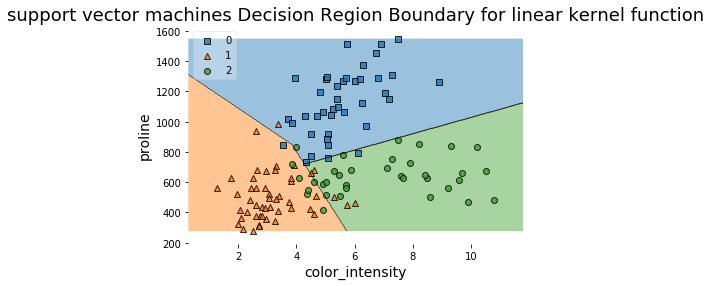

In [14]:
# Plot Decision Region using mlxtend's awesome plotting function ...it is used for linear 
plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=onev_linear,
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('support vector machines Decision Region Boundary for linear kernel function', size=18)
plt.show()

In [15]:
#Non-Linear
print("------------------Non-Linear Kernel function------------------------")



------------------Non-Linear Kernel function------------------------


In [26]:
#SVC is used for classification and regression analysis
onev_nonlinear = SVC(kernel='rbf', random_state=0, gamma=0.0001,C=0.5, decision_function_shape = "ovo",shrinking=False,probability=False).fit(X_training,train_labels)
#predict the outcome with the help of testing
onev_nonlinear_predicted=onev_nonlinear.predict(X_testing)

In [40]:
# confusion matrix for non-linear kernel function
confusionMatrix_nonlinear = confusion_matrix(test_labels, onev_nonlinear_predicted)
print(confusionMatrix_nonlinear)

[[16  0  3]
 [ 2 13  7]
 [ 0  5  8]]


In [28]:
#to calculate non linear precision
precision_nonlinear = precision_recall_fscore_support(test_labels, onev_nonlinear_predicted, average='macro')
print("The Precision for Non-Linear support vector machine is " + str(precision_nonlinear[0]))
print("The Recall for Non-Linear  support vector machine is " + str(precision_nonlinear[1]))
print("The fscore for Non-Linear  support vector machine is " + str(precision_nonlinear[2]))
print("The Support for Non-Linear  support vector machine is " + str(precision_nonlinear[3]))


The Precision for Non-Linear support vector machine is 0.6851851851851851
The Recall for Non-Linear  support vector machine is 0.682799656483867
The fscore for Non-Linear  support vector machine is 0.6769979657076431
The Support for Non-Linear  support vector machine is None


In [29]:
# to generate classification report for non linear kernel function
print(classification_report(test_labels,onev_nonlinear_predicted, target_names=label_names))


              precision    recall  f1-score   support

     class_0       0.89      0.84      0.86        19
     class_1       0.72      0.59      0.65        22
     class_2       0.44      0.62      0.52        13

   micro avg       0.69      0.69      0.69        54
   macro avg       0.69      0.68      0.68        54
weighted avg       0.71      0.69      0.69        54



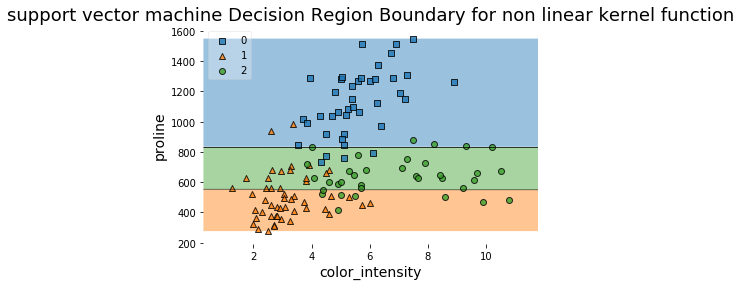

In [41]:

# Plot Decision Region using mlxtend's awesome plotting function for non linear function
plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=onev_nonlinear,
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('support vector machine Decision Region Boundary for non linear kernel function', size=18)
plt.show()


In [30]:

#Poly
print("-----------------Polynomial kernel function----------------------")


-----------------Polynomial kernel function----------------------


In [32]:
#SVC is used for classification and regression analysis
poly= SVC(random_state=0, kernel="poly",gamma=0.0001, decision_function_shape = "ovo", degree = 3).fit(X_training,train_labels)
#predict the outcome with the help of testing
poly_predicted=poly.predict(X_testing)

In [33]:
# confusion matrix for poly kernel function
confusionMatrix_onevone = confusion_matrix(test_labels,poly_predicted)
print(confusionMatrix_onevone)


[[16  1  2]
 [ 0 22  0]
 [ 0  0 13]]


In [34]:
#to calculate poly precision
precision_onevone = precision_recall_fscore_support(test_labels,poly_predicted, average='macro')
print("The Precision for Polynomial  support vector machine is " + str(precision_onevone[0]))
print("The Recall for Polynomial  support vector machine is " + str(precision_onevone[1]))
print("The fscore for Polynomial  support vector machine is " + str(precision_onevone[2]))
print("The Support for Polynomial  support vector machine is " + str(precision_onevone[3]))


The Precision for Polynomial  support vector machine is 0.9410628019323672
The Recall for Polynomial  support vector machine is 0.9473684210526315
The fscore for Polynomial  support vector machine is 0.9402116402116402
The Support for Polynomial  support vector machine is None


In [35]:
# to generate classification report for poly kernel function
print(classification_report(test_labels,poly_predicted, target_names=label_names))

              precision    recall  f1-score   support

     class_0       1.00      0.84      0.91        19
     class_1       0.96      1.00      0.98        22
     class_2       0.87      1.00      0.93        13

   micro avg       0.94      0.94      0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



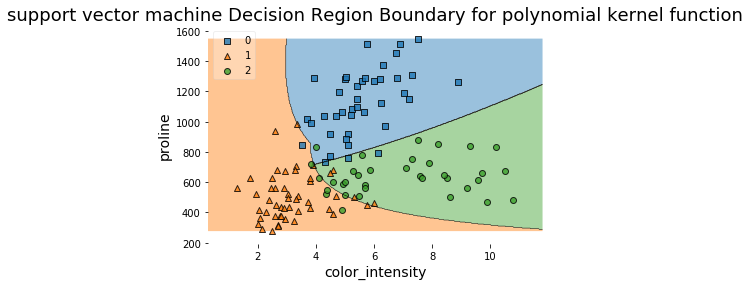

In [42]:
# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=poly,
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('support vector machine Decision Region Boundary for polynomial kernel function', size=18)
plt.show()